# Claire & Sam HW1.4

# 1: Imports & Asset Definition
Import your packages (add whatever you need for the plotting steps at the end)
Let the user specify what contract they want to trade.

In [1]:
import numpy as np
import pandas as pd
import shinybroker as sb
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define an asset that you're interested in
# (I used Netflix)
asset= sb.Contract({
    'symbol': "ARES",
    'secType': "STK",
    'exchange': "SMART",
    'currency': "USD"
})

benchmark = sb.Contract({
    'symbol': "SPX",
    'secType': "IND",
    'exchange': "CBOE",
    'currency': "USD"
})

# 2: Make your data queries to IBKR
You need 3 things:
- `historical_data_hourly`: bar size of 1 hour over the last 6 months
- `historical_data_daily`: bar size of 1 day over the last 6 months
- the `liquidityHours` dataframe returned by `fetch_contract_details` for
your asset.

In [2]:
#### Get hourly data to use for calculating vol
historical_data_hourly_fetch = sb.fetch_historical_data(
    contract=asset,
    endDateTime='',         # Let IBKR set the "now" time
    durationStr='1 Y',      # Past 1 year
    barSizeSetting='1 hour', # Daily bars
    whatToShow='TRADES',
    useRTH=True,
    #date_format=1,          # String time zone date
    #keepUpToDate=False
)
historical_data_hourly = historical_data_hourly_fetch['hst_dta']

#### Get daily data as well because it speeds up the code
####   writing process.
historical_data_daily_fetch = sb.fetch_historical_data(
    contract=asset,
    endDateTime='',         # Let IBKR set the "now" time
    durationStr='1 Y',      # Past 1 year
    barSizeSetting='1 day', # Daily bars
    whatToShow='TRADES',
    useRTH=True,
    #date_format=1,          # String time zone date
    #keepUpToDate=False
)
historical_data_daily = historical_data_daily_fetch['hst_dta']
print(historical_data_daily)

#### Fetch your liquid trading hours for the asset
#### You'll need this later!
ares_deets = sb.fetch_contract_details(
    contract=sb.Contract({
        'symbol': "ARES",
        'secType': "STK",
        'exchange': "SMART",
        'currency': "USD"
    })
)
liquid_hours = ares_deets['liquidHours']
print(liquid_hours)
#liquid_hours = (ares_deets['liquidHours'][0])

      timestamp    open    high     low   close   volume      wap  barCount
0    2024-03-28  133.16  134.05  131.06  132.98   322176  133.103      2551
1    2024-04-01  132.89  132.90  130.18  132.39   533913  131.726      3474
2    2024-04-02  130.90  131.32  128.29  130.80   868227  129.666      4826
3    2024-04-03  130.96  133.04  130.50  131.98   528348  132.144      3552
4    2024-04-04  133.00  133.89  131.53  132.20  1113865  132.612      6618
..          ...     ...     ...     ...     ...      ...      ...       ...
245  2025-03-21  145.98  149.05  144.48  147.71   816259  147.603      5733
246  2025-03-24  151.04  154.12  150.55  153.75  1013719  153.379      7301
247  2025-03-25  154.34  156.06  151.63  155.63  1268229  154.996      7445
248  2025-03-26  155.66  156.40  152.02  153.28  1463406  153.954      8179
249  2025-03-27  150.80  152.75  144.95  148.40  1127927  148.546      6279

[250 rows x 8 columns]
0               start_time  end_time  closed
2025-0...
Name: liq

## Fetch IV

In [3]:
#### Get hourly data to use for calculating vol
iv_historical_data_hourly_fetch = sb.fetch_historical_data(
    contract=asset,
    endDateTime='',         # Let IBKR set the "now" time
    durationStr='1 Y',      # Past 1 year
    barSizeSetting='1 hour', # Daily bars
    whatToShow='OPTION_IMPLIED_VOLATILITY',
    useRTH=True,
    #date_format=1,          # String time zone date
    #keepUpToDate=False
)
iv_historical_data_hourly = iv_historical_data_hourly_fetch['hst_dta']

#### Get daily data as well because it speeds up the code
####   writing process.
iv_historical_data_daily_fetch = sb.fetch_historical_data(
    contract=asset,
    endDateTime='',         # Let IBKR set the "now" time
    durationStr='1 Y',      # Past 1 year
    barSizeSetting='1 day', # Daily bars
    whatToShow='OPTION_IMPLIED_VOLATILITY',
    useRTH=True,
    #date_format=1,          # String time zone date
    #keepUpToDate=False
)
iv_historical_data_daily = iv_historical_data_daily_fetch['hst_dta']
print(iv_historical_data_daily)

      timestamp      open      high       low     close  volume    wap  \
0    2024-03-28  0.267327  0.276899  0.240832  0.254008       1  0.277   
1    2024-04-01  0.264707  0.304219  0.252817  0.274692       1  0.304   
2    2024-04-02  0.276693  0.299488  0.263739  0.284233       1  0.299   
3    2024-04-03  0.286249  0.313395  0.278201  0.286408       1  0.313   
4    2024-04-04  0.295282  0.295282  0.273788  0.289932       1  0.295   
..          ...       ...       ...       ...       ...     ...    ...   
245  2025-03-21  0.377147  0.399799  0.362225  0.365130       1  0.400   
246  2025-03-24  0.367288  0.367288  0.339921  0.345858       1  0.367   
247  2025-03-25  0.348049  0.359891  0.342350  0.348191       1  0.360   
248  2025-03-26  0.348334  0.365844  0.341000  0.363288       1  0.366   
249  2025-03-27  0.352811  0.398577  0.352811  0.382734       1  0.399   

     barCount  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  

## Fetch SMA

In [4]:
historical_data_daily_fetch_SMA = sb.fetch_historical_data(
    contract=asset,
    endDateTime='',         # Let IBKR set the "now" time
    durationStr='2 Y',      # Past 1 year
    barSizeSetting='1 day', # Daily bars
    whatToShow='TRADES',
    useRTH=True,
    #date_format=1,          # String time zone date
    #keepUpToDate=False
)
historical_data_daily_SMA = historical_data_daily_fetch_SMA['hst_dta']#%% md
## Fetch VWAP

import pandas as pd

# Make sure 'date' is a datetime column
historical_data_daily_SMA['timestamp'] = pd.to_datetime(historical_data_daily_SMA['timestamp'])

# Sort by date just to be safe
historical_data_daily_SMA = historical_data_daily_SMA.sort_values('timestamp')

# Calculate 20-day simple moving average
historical_data_daily_SMA['SMA_20'] = historical_data_daily_SMA['close'].rolling(window=20).mean()

print(historical_data_daily_SMA['SMA_20'])


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
496    154.6950
497    153.9370
498    153.3505
499    152.5660
500    151.6300
Name: SMA_20, Length: 501, dtype: float64


# 3 Data Prep
- create `trd_prd` column on your fetched dataframes
- delete all data in `historical_data_daily` that occurs before the first
isoweek (i.e., trade period) that has a full 5 trading days

Since we're opening positions every Monday and holding them for no more then
one trading week, we're going to define a "trade period" for ourselves by
making use of datetime's *isoweek* function class.

*isocalendar* can take any date and return the numbered week and year for
that date.

To see how this works, consider that to us, Monday, 30 Dec 2024 and Friday,
03 Jan 2025 fall within the same trading, even though the dates have different
years and months.  *isoweek* handles this for us by assigning days during
that week to 'the first week in January 2025'.

Try this yourself with the following commands:

`datetime.datetime(2024, 12, 30).isocalendar()[1]`

`datetime.datetime(2025, 1, 3).isocalendar()[1]`

more info on isocalendar:
https://www.geeksforgeeks.org/isocalendar-method-of-datetime-class-in-python/

**In the cell below, add a column named `trd_prd` (for 'trade period' to
`historical_data_daily`, `historical_data_hourly` and `liquid_hours`**. The `trd_prd` column should be a float containing the four-digit year and the numbered isoweek as a decimal; for example, the trade period of 03 Jan 2025 would be `2025.01`.

Also, modify your `historical_data_daily` dataframe by deleting all data rows
that occured before the Monday of the first week that has 5 full trading days.

In [5]:
#### Prepare Data
# Function to calculate trade period
def get_trade_period(dt):
    iso_year, iso_week, _ = dt.isocalendar()
    return float(f"{iso_year}.{iso_week:02d}")

# Ensure 'date' column is in datetime format
historical_data_daily['timestamp'] = pd.to_datetime(historical_data_daily['timestamp'])
historical_data_hourly['timestamp'] = pd.to_datetime(historical_data_hourly['timestamp'])
iv_historical_data_daily['timestamp'] = pd.to_datetime(iv_historical_data_daily['timestamp'])
iv_historical_data_hourly['timestamp'] = pd.to_datetime(iv_historical_data_hourly['timestamp'])
#liquid_hours['timestamp'] = pd.to_datetime(liquid_hours['timestamp'])

# Apply trade period calculation
historical_data_daily['trd_prd'] = historical_data_daily['timestamp'].apply(get_trade_period)
historical_data_hourly['trd_prd'] = historical_data_hourly['timestamp'].apply(get_trade_period)
iv_historical_data_daily['trd_prd'] = iv_historical_data_daily['timestamp'].apply(get_trade_period)
iv_historical_data_hourly['trd_prd'] = iv_historical_data_hourly['timestamp'].apply(get_trade_period)
historical_data_daily_SMA['trd_prd'] = historical_data_daily_SMA['timestamp'].apply(get_trade_period)

#liquid_hours['trd_prd'] = liquid_hours['timestamp'].apply(get_trade_period)

# Identify the first full five-trading-day week
weekly_counts = historical_data_daily.groupby('trd_prd')['timestamp'].count()
first_full_week = weekly_counts[weekly_counts >= 5].index.min()

# Filter historical_data_daily
historical_data_daily = historical_data_daily[historical_data_daily['trd_prd'] >= first_full_week]

# Print dataframes
print("Historical Data Daily:")
print(historical_data_daily)

print("\nHistorical Data Hourly:")
print(historical_data_hourly)

print("IV Historical Data Daily:")
print(iv_historical_data_daily)

print("\n IV Historical Data Hourly:")
print(iv_historical_data_hourly)

print("Historical SMA Data Daily:")
print(historical_data_daily_SMA)

print("\nLiquid Hours:")
print(liquid_hours)

Historical Data Daily:
     timestamp    open    high     low   close   volume      wap  barCount  \
1   2024-04-01  132.89  132.90  130.18  132.39   533913  131.726      3474   
2   2024-04-02  130.90  131.32  128.29  130.80   868227  129.666      4826   
3   2024-04-03  130.96  133.04  130.50  131.98   528348  132.144      3552   
4   2024-04-04  133.00  133.89  131.53  132.20  1113865  132.612      6618   
5   2024-04-05  131.95  134.80  131.22  134.16   740789  133.339      4095   
..         ...     ...     ...     ...     ...      ...      ...       ...   
245 2025-03-21  145.98  149.05  144.48  147.71   816259  147.603      5733   
246 2025-03-24  151.04  154.12  150.55  153.75  1013719  153.379      7301   
247 2025-03-25  154.34  156.06  151.63  155.63  1268229  154.996      7445   
248 2025-03-26  155.66  156.40  152.02  153.28  1463406  153.954      8179   
249 2025-03-27  150.80  152.75  144.95  148.40  1127927  148.546      6279   

     trd_prd  
1    2024.14  
2    2024.

# 3 Vol Calcs
Create an indexed, 2-column dataframe named `vol_calcs` having the following
structure:
- One row for each trade period
- Index is trade period, only one row per period
- A column for `obs_vol`: the volatility observed for the trading period
using hourly log returns, expressed as vol per week
- A column for `exp_vol`: the volatility that we EXPECT for each trading
period. For now, assume that the volatility that we expect for each period =
the volatility of the period preceding it; for example, the `exp_vol` of
period 2024.44 would equal the `obs_vol` for period 2024.43. Express as vol
per week.
- We won't have a value for `exp_vol` for the very first trading period, so
leave that as `None`

Assume that there are 32.5 trading hours per trading week.


In [24]:
# Calc Obs & Exp Vol
# Extract trade periods from daily historical data
trade_periods = historical_data_daily['trd_prd'].unique()

# Calculate observed volatility using hourly data
hourly_log_returns = np.log(historical_data_hourly['close'] / historical_data_hourly['close'].shift(1))
hourly_vols = hourly_log_returns.groupby(historical_data_hourly['timestamp'].dt.strftime('%Y-%W')).std()

# Convert hourly vol to weekly vol (scale by sqrt(32.5))
weekly_vols = hourly_vols * np.sqrt(32.5)

# Create DataFrame
vol_calcs = pd.DataFrame(index=trade_periods, columns=['obs_vol', 'exp_vol'])
vol_calcs['obs_vol'] = weekly_vols.values[:len(trade_periods)]

# Set expected vol (shifted obs_vol)
vol_calcs['exp_vol'] = vol_calcs['obs_vol'].shift(1)

# Display the DataFrame
print("\nVolatility Calculations:")
print(vol_calcs)




Volatility Calculations:
          obs_vol   exp_vol
2024.14  0.013177       NaN
2024.15  0.038277  0.013177
2024.16  0.026123  0.038277
2024.17  0.031752  0.026123
2024.18  0.037421  0.031752
2024.19  0.058997  0.037421
2024.20  0.041709  0.058997
2024.21  0.030747  0.041709
2024.22  0.055541  0.030747
2024.23  0.026734  0.055541
2024.24  0.035181  0.026734
2024.25  0.049880  0.035181
2024.26  0.024201  0.049880
2024.27  0.025558  0.024201
2024.28  0.025460  0.025558
2024.29  0.035751  0.025460
2024.30  0.040661  0.035751
2024.31  0.038725  0.040661
2024.32  0.065120  0.038725
2024.33  0.078962  0.065120
2024.34  0.028736  0.078962
2024.35  0.019785  0.028736
2024.36  0.026346  0.019785
2024.37  0.031696  0.026346
2024.38  0.034750  0.031696
2024.39  0.032657  0.034750
2024.40  0.019770  0.032657
2024.41  0.031140  0.019770
2024.42  0.044910  0.031140
2024.43  0.030065  0.044910
2024.44  0.027089  0.030065
2024.45  0.048315  0.027089
2024.46  0.064099  0.048315
2024.47  0.033129  0.0

### Smarter vol expectation

In [31]:
# Calc Obs & Exp Vol
# Extract trade periods from daily historical data
trade_periods = historical_data_daily['trd_prd'].unique()

# Calculate observed volatility using hourly data
hourly_log_returns = np.log(historical_data_hourly['close'] / historical_data_hourly['close'].shift(1))
hourly_vols = hourly_log_returns.groupby(historical_data_hourly['timestamp'].dt.strftime('%Y-%W')).std()

# Convert hourly vol to weekly vol (scale by sqrt(32.5))
weekly_vols = hourly_vols * np.sqrt(32.5)

# Create DataFrame
smart_vol_calcs = pd.DataFrame(index=trade_periods, columns=['obs_vol', 'exp_vol'])
smart_vol_calcs['obs_vol'] = weekly_vols.values[:len(trade_periods)]

# Set expected vol (from options IV)
for trd_prd in smart_vol_calcs.index:
    smart_vol_calcs.at[trd_prd, 'exp_vol'] = iv_historical_data_hourly.loc[
        iv_historical_data_hourly['trd_prd'] == trd_prd, 'open'
    ].iloc[0] * np.sqrt(1/52)

# Display the DataFrame
print("\nVolatility Calculations:")
print(smart_vol_calcs)
vol_calcs = smart_vol_calcs

#vol_calcs = smart_vol_calcs # manually toggle active vol calc


Volatility Calculations:
          obs_vol   exp_vol
2024.14  0.013177  0.036708
2024.15  0.038277    0.0388
2024.16  0.026123  0.045514
2024.17  0.031752  0.041529
2024.18  0.037421  0.041129
2024.19  0.058997  0.035865
2024.20  0.041709   0.03117
2024.21  0.030747  0.028702
2024.22  0.055541  0.030333
2024.23  0.026734  0.035066
2024.24  0.035181  0.036792
2024.25  0.049880  0.033094
2024.26  0.024201  0.034252
2024.27  0.025558   0.03603
2024.28  0.025460  0.035568
2024.29  0.035751  0.037886
2024.30  0.040661  0.041298
2024.31  0.038725  0.041963
2024.32  0.065120  0.046619
2024.33  0.078962  0.038366
2024.34  0.028736  0.031572
2024.35  0.019785  0.032297
2024.36  0.026346  0.030705
2024.37  0.031696  0.037873
2024.38  0.034750  0.036887
2024.39  0.032657  0.035955
2024.40  0.019770  0.040691
2024.41  0.031140  0.042945
2024.42  0.044910  0.041672
2024.43  0.030065  0.042331
2024.44  0.027089  0.043407
2024.45  0.048315  0.042075
2024.46  0.064099  0.033809
2024.47  0.033129  0.0

# 4 Initialize your blotter and your ledger
Create two dataframes: `blotter` and `ledger`.
They will be empty except for the columns we are able to calculate now.
You can use `0`, `0.0`, `None`, and/or `pd.NA` as your initial values,
depending on the datatype you want the column to be.

For `blotter`:
- Every row represents a trading period
- The Index is trading period, starting on the second trading period of
`historical_data_daily`
- has empty columns for: `entry_timestamp`, `qty`, `exit_timestamp`, `entry_price`,
`exit_price`, and `success`.

For `ledger`:
- every row represents a trading day
- You don't need to specify an index (I didn't, but you can if it helps)
- Has columns for: `date`, `position`, `cash`, `mark`, and `mkt_value`
- Initialize values for `date` and `mark` in this step; the others we'll
calculate in the next step.
    - The `date` column should have every trade date in `historical_data_daily`
except for those that occur within the very first trading period.
    - Each row of the `mark` (for "mark-to-market price") column should have the
end-of-day closing price of `asset` for the date given in `date`.

In [32]:
# Extract trade periods from daily historical data
trade_periods = historical_data_daily['trd_prd'].unique()

# Calc blotter
blotter = pd.DataFrame(index=trade_periods[1:], columns=['entry_timestamp', 'qty', 'exit_timestamp', 'entry_price', 'exit_price', 'success', 'iv', 'wap', 'sma'])
blotter[:] = None  # Set empty values
print("\nBlotter:")
print(blotter)

# Initialize Ledger
filtered_historical = historical_data_daily[historical_data_daily['trd_prd'] != historical_data_daily['trd_prd'].iloc[0]]
ledger = pd.DataFrame()
ledger['date'] = filtered_historical['timestamp']
ledger['position'] = 0.0  # Placeholder values
ledger['cash'] = 0.0  # Placeholder values
ledger['mark'] = historical_data_daily['close'][1:]
ledger['mkt_value'] = 0.0  # Placeholder values
#ledger['cash'] = 50000

print("\nLedger:")
print(ledger)



Blotter:
        entry_timestamp   qty exit_timestamp entry_price exit_price success  \
2024.15            None  None           None        None       None    None   
2024.16            None  None           None        None       None    None   
2024.17            None  None           None        None       None    None   
2024.18            None  None           None        None       None    None   
2024.19            None  None           None        None       None    None   
2024.20            None  None           None        None       None    None   
2024.21            None  None           None        None       None    None   
2024.22            None  None           None        None       None    None   
2024.23            None  None           None        None       None    None   
2024.24            None  None           None        None       None    None   
2024.25            None  None           None        None       None    None   
2024.26            None  None           No

## 5 The blotter & ledger loop
Now it's time to finish calculating the blotter and the ledger.

Do this in a loop that iterates over every `trd_prd` in `blotter.index`. Your
 loop should operate as follows:

1. Declare a variable `entry_timestamp` that holds the timestamp of our entry
 trade for the `trd_prd`
2. Declare a variable `entry_price` that holds the price we would have gotten
 for the asset at the start of the `trd_prd`

Now we need to figure out if we would have bought long or sold short during
that trade period. Do this by comparing `entry_price` to the `close` price on
 the last day of the **previous** trading period. Use close prices from
 `historical_data_daily` for this task because `historical_data_hourly` can
 unpredictably include after-hours prices.

If `entry_price` > closing price of the previous period, then we **short**
100 shares at market open and immediately issue a limit order to **buy** 100
shares at  `entry_price`*(1-expected vol for the `trd_prd`)

If `entry_price` <= closing price of the previous period, then we **buy**
100 shares at market open and immediately issue a limit order to **sell** 100
 shares at `entry_price`*(1+expected vol for the `trd_prd`).

Write code that correctly calculates the values for the following variables:
3. `qty`: the amount of shares we're trading. 100 if buying long, -100 if
shorting.
4. `exit_price_strategy`: the price at which we would *like* our exit limit
order to fill

Determine the *actual* exit prices and timestamps that would have been
realized by this strategy. Use `historical_data_hourly` to get these data so
that you can have a nice timestamp for your exit time. Declare variables for
the below to store the results of your calculations:
5. `exit_price`: the price at which we exited.
6. `exit_timestamp`: the datetime at which we exited
7. `success`: True if our exit order was filled; False if we had to manually
exit with a market order to close at the end of the trade period.

To calculate 5 through 7, compare `exit_price_strategy` to the maximum `high` price during the trading period if selling to exit a
long position, and to the `low` price during the trading period if buying to
cover a short. If `high` < `exit_price_strategy` to sell, or if `low` >
`exit_price_strategy` to buy to cover, then we know that the trade was not a
success. In that case, set  `success`=False, set `exit_price` to the closing
price at the end of the period (using `historical_data_daily`), and set
`exit_timestamp` to market close time on the last day of the trading period
(4pm EST) when we would have exited the trade and gotten the close price.

## Open positions
In your code, for the very last trading period, you may encounter the
situation wherein trades are still 'live' or 'open', meaning that the exiting
 limit order hasn't filled yet but there are still a few days left in the
 trading period.

That will happen, for example, if you run your code on a Monday. For the most
 recent trading position, your code will calculate an entry price and
 timestamp, but the exit order hasn't filled yet because the stock hasn't
 had time to move -- there are still four days left in the week.

In that case, you should set `None` or `pd.NA` for `exit_price`,
`exit_timestamp`, and `success`, because we don't know what's going to happen
 yet.

This aspect is best handled in your code by using your `liquid_hours`
dataframe to calculate `last_ts_this_week`; i.e., the timestamp at which the current trading period
 ends. If your limit order hasn't filled, but the timestamp of your most
 recent historical data is less than `last_ts_this_week`, then you know there
  is still time to wait and that you should assign the `None` or `pd.NA`
  values to the parameters as described above.

8. Assign `entry_timestamp`, `qty`, `exit_timestamp`, `entry_price`,
`exit_price`, and `success` to your `blotter` dataframe on the row whose
index matches `trd_prd`.

## That takes care of your `blotter` entry for the `trd_prd`. Now for `ledger`

(this is in the same loop, after the code to accomplish the tasks above)

9. **Position**:  to every date in the ledger >= `entry_timestamp`, add `qty`
 to the `position` column. For every date in the ledger >= `exit_timestamp`,
 subtract `qty` from the `position` column. This works best if you set the `position` column to
zero when initializing your `ledger` df in Step 4.
10.  **Cash**: Same idea as `position`. For every date in the ledger >= `exit_timestamp`,
 subtract `qty`\*`entry_price` from the `cash` column. For every date in the
 ledger >= `exit_timestamp`,
 add `qty`\*`entry_price` from the `position` column.

Exit your loop. Now there's only one thing left to handle: `mkt_value`:

11. Set the `mkt_value` column of your blotter equal to `position`*`mark` +
`cash`. Doing this will capture your total closing NAV each day.


In [33]:
# Blotter & Ledger Loop
# This is where "backtesting" really occurs. We're calculating the blotter &
# ledger that our trading system WOULD have produced.
for trd_prd in blotter.index:
    entry_timestamp = historical_data_hourly.loc[historical_data_hourly['trd_prd'] == trd_prd, 'timestamp'].iloc[0]
    entry_price = historical_data_hourly.loc[historical_data_hourly['trd_prd'] == trd_prd, 'open'].iloc[0]
    prev_close = historical_data_daily.loc[historical_data_daily['trd_prd'] < trd_prd, 'close'].iloc[-1]
    exp_vol = vol_calcs.loc[trd_prd, 'exp_vol'] 
    iv = iv_historical_data_hourly.loc[iv_historical_data_hourly['trd_prd'] == trd_prd, 'wap'].iloc[0]
    wap = historical_data_hourly.loc[historical_data_hourly['trd_prd'] == trd_prd, 'wap'].iloc[0]
    sma = historical_data_daily_SMA.loc[historical_data_daily_SMA['trd_prd'] == trd_prd, 'SMA_20'].iloc[0]
    
    if entry_price > prev_close:
        qty = -100
        exit_price_strategy = entry_price * (1 - exp_vol)
    else:
        qty = 100
        exit_price_strategy = entry_price * (1 + exp_vol)
        
    period_data = historical_data_hourly[historical_data_hourly['trd_prd'] == trd_prd]
    max_high = period_data['high'].max()
    min_low = period_data['low'].min()
    
    if (qty > 0 and max_high >= exit_price_strategy) or (qty < 0 and min_low <= exit_price_strategy):
        success = True
        exit_price = exit_price_strategy

        if qty > 0:
            exit_timestamp = period_data.loc[period_data['high'] >= exit_price_strategy, 'timestamp'].iloc[0]
            exit_high_price = period_data.loc[period_data['high'] >= exit_price_strategy, 'high'].iloc[0]
            exit_low_price = period_data.loc[period_data['high'] >= exit_price_strategy, 'low'].iloc[0]
        else:
            exit_timestamp = period_data.loc[period_data['low'] <= exit_price_strategy, 'timestamp'].iloc[0]
            exit_high_price = period_data.loc[period_data['low'] <= exit_price_strategy, 'high'].iloc[0]
            exit_low_price = period_data.loc[period_data['low'] <= exit_price_strategy, 'low'].iloc[0]

        #print(exit_low_price, exit_high_price, exit_price_strategy, exit_timestamp, qty)
    else:
        success = False
        exit_price = historical_data_daily.loc[historical_data_daily['trd_prd'] == trd_prd, 'close'].iloc[-1]
        #exit_timestamp = historical_data_daily.loc[historical_data_daily['trd_prd'] == trd_prd, 'timestamp'].iloc[-1]
        exit_timestamp = pd.to_datetime(
        historical_data_daily.loc[historical_data_daily['trd_prd'] == trd_prd, 'timestamp'].iloc[-1]).replace(hour=15, minute=0, second=0)

    
    blotter.loc[trd_prd] = [entry_timestamp, qty, exit_timestamp, entry_price, exit_price, success, iv, wap, sma]
    
    ledger.loc[ledger['date'] >= entry_timestamp, 'position'] += qty
    ledger.loc[ledger['date'] >= exit_timestamp, 'position'] -= qty
    ledger.loc[ledger['date'] >= entry_timestamp, 'cash'] -= qty * entry_price
    ledger.loc[ledger['date'] >= exit_timestamp, 'cash'] += qty * exit_price

# finally, calculate your strategy's end-of-day mark-to-market value
ledger['mkt_value'] = ledger['position'] * ledger['mark'] + ledger['cash']

print(blotter)
print(ledger)

# Deal with the open positions thing

             entry_timestamp   qty       exit_timestamp entry_price  \
2024.15  2024-04-08 09:30:00  -100  2024-04-12 15:00:00      134.56   
2024.16  2024-04-15 09:30:00  -100  2024-04-19 15:00:00      132.53   
2024.17  2024-04-22 09:30:00  -100  2024-04-26 15:00:00      131.09   
2024.18  2024-04-29 09:30:00  -100  2024-05-02 09:30:00      134.27   
2024.19  2024-05-06 09:30:00  -100  2024-05-10 15:00:00      132.31   
2024.20  2024-05-13 09:30:00  -100  2024-05-17 15:00:00      142.86   
2024.21  2024-05-20 09:30:00   100  2024-05-24 15:00:00      145.14   
2024.22  2024-05-28 09:30:00  -100  2024-05-31 10:00:00      146.25   
2024.23  2024-06-03 09:30:00  -100  2024-06-03 13:00:00      141.46   
2024.24  2024-06-10 09:30:00   100  2024-06-10 10:00:00      132.44   
2024.25  2024-06-17 09:30:00  -100  2024-06-21 15:00:00      132.92   
2024.26  2024-06-24 09:30:00  -100  2024-06-28 15:00:00       132.1   
2024.27  2024-07-01 09:30:00  -100  2024-07-05 15:00:00      134.38   
2024.2

## Logistic Regression

In [34]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = blotter[['iv', 'wap', 'sma']]
y = blotter['success'].astype(int)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y.value_counts())


# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
# y_pred = model.predict(X_test) # 0.5 threshold
probs = model.predict_proba(X_test)[:, 1]
y_pred = (probs > 0.3).astype(int)

fill = len(y_train)
padded_y_pred = np.concatenate(([1.0] * fill, y_pred))
blotter['prediction'] = pd.Series(padded_y_pred, index=blotter.index)

# Results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(classification_report(y_test, y_pred))
print("Blotter", blotter)

success
0    33
1    18
Name: count, dtype: int64
Coefficients: [[-0.02367813  0.0086737   0.02961959]]
Intercept: [-6.84137241]
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.50      0.57      0.53         7

    accuracy                           0.56        16
   macro avg       0.56      0.56      0.56        16
weighted avg       0.57      0.56      0.56        16

Blotter              entry_timestamp   qty       exit_timestamp entry_price  \
2024.15  2024-04-08 09:30:00  -100  2024-04-12 15:00:00      134.56   
2024.16  2024-04-15 09:30:00  -100  2024-04-19 15:00:00      132.53   
2024.17  2024-04-22 09:30:00  -100  2024-04-26 15:00:00      131.09   
2024.18  2024-04-29 09:30:00  -100  2024-05-02 09:30:00      134.27   
2024.19  2024-05-06 09:30:00  -100  2024-05-10 15:00:00      132.31   
2024.20  2024-05-13 09:30:00  -100  2024-05-17 15:00:00      142.86   
2024.21  2024-05-20 09:30:00   100  202

# 6 Analyze!
Now we've done all the hard work, so let's see how the strategy did!



## 6.1: Plot of NAV over time

Plot your NAV over time. You can use a barchart, scatterplot, or whatever
you want to try so long as you communicate the information. Using three
distinct colors and/or shapes, color your plot according to whether you were
long, short or cash-only on that day. You may use the example I shared in class.

(don't forget to color by long/short)

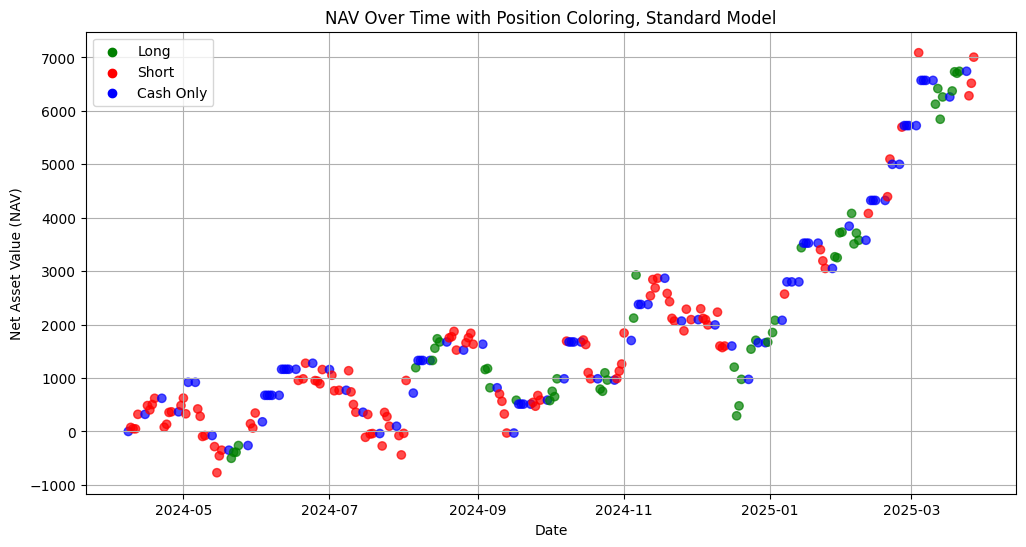

In [35]:
# Create an empty list to store categories
position_category = []

# Categorize positions manually
for pos in ledger['position']:
    if pos > 0:
        position_category.append('Long')
    elif pos < 0:
        position_category.append('Short')
    else:
        position_category.append('Cash Only')

# Add category column to ledger
ledger['position_category'] = position_category

# Define colors for each category
color_map = {'Long': 'green', 'Short': 'red', 'Cash Only': 'blue'}
colors = []

# Assign colors manually
for cat in ledger['position_category']:
    colors.append(color_map[cat])

# Plot NAV over time
plt.figure(figsize=(12, 6))
plt.scatter(ledger['date'], ledger['mkt_value'], c=colors, alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Net Asset Value (NAV)')
plt.title('NAV Over Time with Position Coloring, Standard Model')
plt.grid(True)

# Manually add legend
for cat, color in color_map.items():
    plt.scatter([], [], color=color, label=cat)

plt.legend()
plt.show()

## Enhanced Model

Create new ledger

In [36]:
# Initialize Ledger
filtered_historical = historical_data_daily[historical_data_daily['trd_prd'] != historical_data_daily['trd_prd'].iloc[0]]
new_ledger = pd.DataFrame()
new_ledger['date'] = filtered_historical['timestamp']
new_ledger['position'] = 0.0  # Placeholder values
new_ledger['cash'] = 0.0  # Placeholder values
new_ledger['mark'] = historical_data_daily['close'][1:]
new_ledger['mkt_value'] = 0.0  # Placeholder values
#new_ledger['cash'] = 50000

for trd_prd in blotter.index:
    if blotter.loc[trd_prd]['prediction'] == 0: # if the trade is predicted to fail, no trade
        qty = 0
    else: # if in train set or predicted success, make the trade
        qty = blotter.loc[trd_prd, 'qty'] 

    entry_price = blotter.loc[trd_prd]['entry_price']  
    entry_timestamp = blotter.loc[trd_prd]['entry_timestamp']
    exit_timestamp = blotter.loc[trd_prd]['exit_timestamp']
    exit_price = blotter.loc[trd_prd]['exit_price']
        
    new_ledger.loc[new_ledger['date'] >= entry_timestamp, 'position'] += qty
    new_ledger.loc[new_ledger['date'] >= exit_timestamp, 'position'] -= qty
    new_ledger.loc[new_ledger['date'] >= entry_timestamp, 'cash'] -= qty * entry_price
    new_ledger.loc[new_ledger['date'] >= exit_timestamp, 'cash'] += qty * exit_price

# finally, calculate your strategy's end-of-day mark-to-market value
new_ledger['mkt_value'] = new_ledger['position'] * new_ledger['mark'] + new_ledger['cash']
print(new_ledger)

          date  position          cash    mark    mkt_value
6   2024-04-08       0.0      0.000000  135.16     0.000000
7   2024-04-09    -100.0  13456.000000  133.80    76.000000
8   2024-04-10    -100.0  13456.000000  134.04    52.000000
9   2024-04-11    -100.0  13456.000000  134.07    49.000000
10  2024-04-12    -100.0  13456.000000  131.35   321.000000
..         ...       ...           ...     ...          ...
245 2025-03-21     100.0  -9519.352149  147.71  5251.647851
246 2025-03-24       0.0   5251.647851  153.75  5251.647851
247 2025-03-25       0.0   5251.647851  155.63  5251.647851
248 2025-03-26       0.0   5251.647851  153.28  5251.647851
249 2025-03-27       0.0   5251.647851  148.40  5251.647851

[244 rows x 5 columns]


NAV Plot

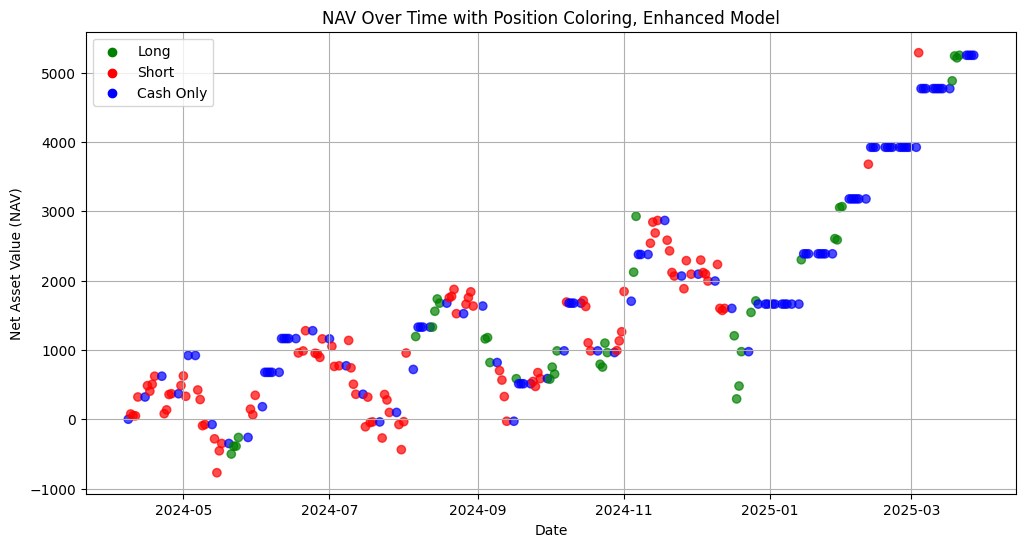

In [37]:
# Create an empty list to store categories
position_category = []

# Categorize positions manually
for pos in new_ledger['position']:
    if pos > 0:
        position_category.append('Long')
    elif pos < 0:
        position_category.append('Short')
    else:
        position_category.append('Cash Only')

# Add category column to new_ledger
new_ledger['position_category'] = position_category

# Define colors for each category
color_map = {'Long': 'green', 'Short': 'red', 'Cash Only': 'blue'}
colors = []

# Assign colors manually
for cat in new_ledger['position_category']:
    colors.append(color_map[cat])

# Plot NAV over time
plt.figure(figsize=(12, 6))
plt.scatter(new_ledger['date'], new_ledger['mkt_value'], c=colors, alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Net Asset Value (NAV)')
plt.title('NAV Over Time with Position Coloring, Enhanced Model')
plt.grid(True)

# Manually add legend
for cat, color in color_map.items():
    plt.scatter([], [], color=color, label=cat)

plt.legend()
plt.show()

## 6.2: Alpha/beta plots

Use your round-trip blotter to calculate return **per trade**. Calculate your
trades' alpha and beta as discussed in class (refer to Class 4 slide 8).

Display this information in three plots, one each with respect to:
- your underlying asset (the thing you were trading)
- a benchmark of your choosing (i.e., the SP500)
- volatility error

### 6.2.1: Strategy vs. Underlying Asset
Show the plot and print alpha & beta somewhere in your output.

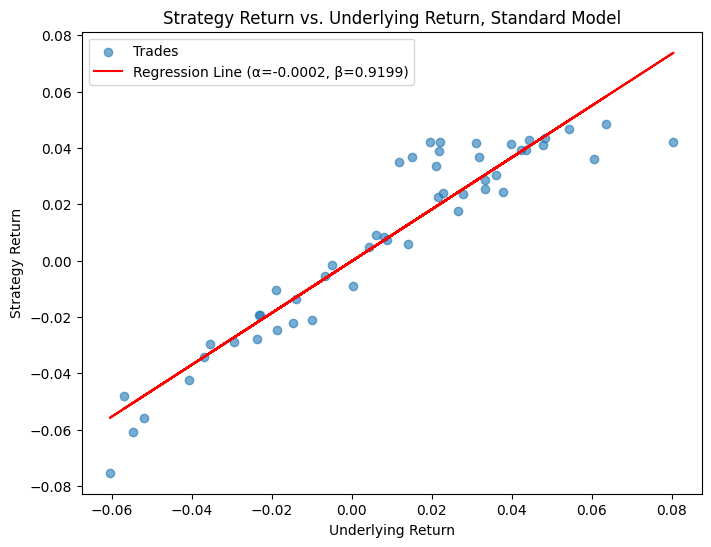

(-0.0001588043142733606, 0.9199389862133722)

In [38]:
blotter['return'] = ((blotter['exit_price'] - blotter['entry_price']) / blotter['entry_price']) * (blotter['qty'] / abs(blotter['qty'])) # get returns irrespective of long/short

#print("\nExit Timestamps:")
#print(blotter['exit_timestamp'])

# Fetch entry and exit prices from historical_data_hourly based on timestamps
blotter['entry_price_underlying'] = blotter['entry_timestamp'].apply(
    lambda ts: historical_data_hourly.loc[historical_data_hourly['timestamp'] == ts, 'close'].iloc[0]
)

blotter['exit_price_underlying'] = blotter.apply(
    lambda row: (
        historical_data_hourly.loc[historical_data_hourly['timestamp'] == row['exit_timestamp'], 'close'].iloc[0]
        if not historical_data_hourly.loc[historical_data_hourly['timestamp'] == row['exit_timestamp'], 'close'].empty
        else (
            historical_data_daily.loc[historical_data_daily['timestamp'] == row['exit_timestamp'], 'close'].iloc[0]
            if not historical_data_daily.loc[historical_data_daily['timestamp'] == row['exit_timestamp'], 'close'].empty
            else None  # If neither dataset has the timestamp
        )
    ), axis=1
)

# Calculate return based on hourly data
blotter['return_underlying'] = (blotter['exit_price_underlying'] - blotter['entry_price_underlying']) / blotter['entry_price_underlying']* (blotter['qty'] / abs(blotter['qty']))

x = pd.to_numeric(blotter['return_underlying'])  
original_index = x.index.copy()
x.dropna(inplace=True)
dropped_rows = original_index.difference(x.index)
y = pd.to_numeric(blotter['return'])  
y.drop(index=dropped_rows, inplace=True)

# Scatter plot of returns
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label="Trades")
plt.xlabel("Underlying Return")
plt.ylabel("Strategy Return")
plt.title("Strategy Return vs. Underlying Return, Standard Model")

#print(x,y)

# Fit a linear regression model to get alpha and beta
x_with_const = sm.add_constant(x)  # Adds intercept for regression
model = sm.OLS(y, x_with_const).fit()
alpha, beta = model.params

# Plot regression line
plt.plot(x, alpha + beta * x, color='red', label=f"Regression Line (α={alpha:.4f}, β={beta:.4f})")
plt.legend()
plt.show()

# Print alpha and beta values

alpha, beta


### Enhanced

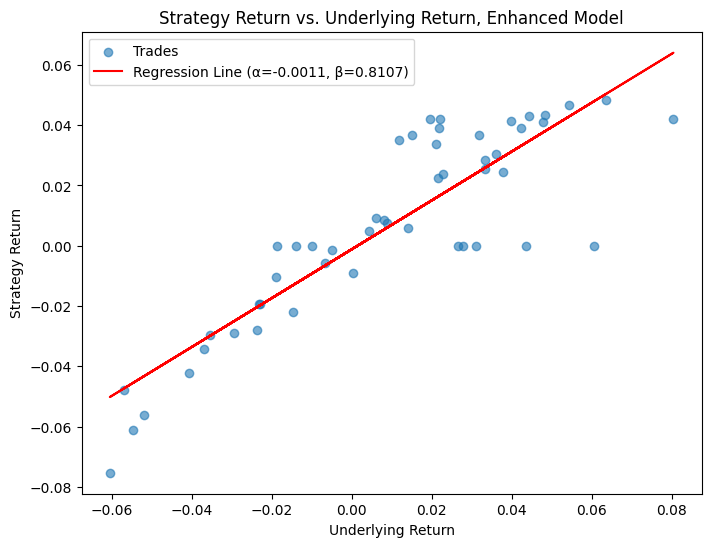

(-0.0011390000852782149, 0.8107126966404729)

In [39]:
blotter['return'] = ((blotter['exit_price'] - blotter['entry_price']) / blotter['entry_price']) * (blotter['qty'] / abs(blotter['qty'])) * blotter['prediction']# get returns irrespective of long/short

#print("\nExit Timestamps:")
#print(blotter['exit_timestamp'])

# Fetch entry and exit prices from historical_data_hourly based on timestamps
blotter['entry_price_underlying'] = blotter['entry_timestamp'].apply(
    lambda ts: historical_data_hourly.loc[historical_data_hourly['timestamp'] == ts, 'close'].iloc[0]
)

blotter['exit_price_underlying'] = blotter.apply(
    lambda row: (
        historical_data_hourly.loc[historical_data_hourly['timestamp'] == row['exit_timestamp'], 'close'].iloc[0]
        if not historical_data_hourly.loc[historical_data_hourly['timestamp'] == row['exit_timestamp'], 'close'].empty
        else (
            historical_data_daily.loc[historical_data_daily['timestamp'] == row['exit_timestamp'], 'close'].iloc[0]
            if not historical_data_daily.loc[historical_data_daily['timestamp'] == row['exit_timestamp'], 'close'].empty
            else None  # If neither dataset has the timestamp
        )
    ), axis=1
)

# Calculate return based on hourly data
blotter['return_underlying'] = (blotter['exit_price_underlying'] - blotter['entry_price_underlying']) / blotter['entry_price_underlying']* (blotter['qty'] / abs(blotter['qty']))

x = pd.to_numeric(blotter['return_underlying'])  
original_index = x.index.copy()
x.dropna(inplace=True)
dropped_rows = original_index.difference(x.index)
y = pd.to_numeric(blotter['return'])  
y.drop(index=dropped_rows, inplace=True)

# Scatter plot of returns
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label="Trades")
plt.xlabel("Underlying Return")
plt.ylabel("Strategy Return")
plt.title("Strategy Return vs. Underlying Return, Enhanced Model")

#print(x,y)

# Fit a linear regression model to get alpha and beta
x_with_const = sm.add_constant(x)  # Adds intercept for regression
model = sm.OLS(y, x_with_const).fit()
alpha, beta = model.params

# Plot regression line
plt.plot(x, alpha + beta * x, color='red', label=f"Regression Line (α={alpha:.4f}, β={beta:.4f})")
plt.legend()
plt.show()

# Print alpha and beta values

alpha, beta

### 6.2.2: Strategy vs. SP500
Show the plot and print alpha & beta somewhere in your output.


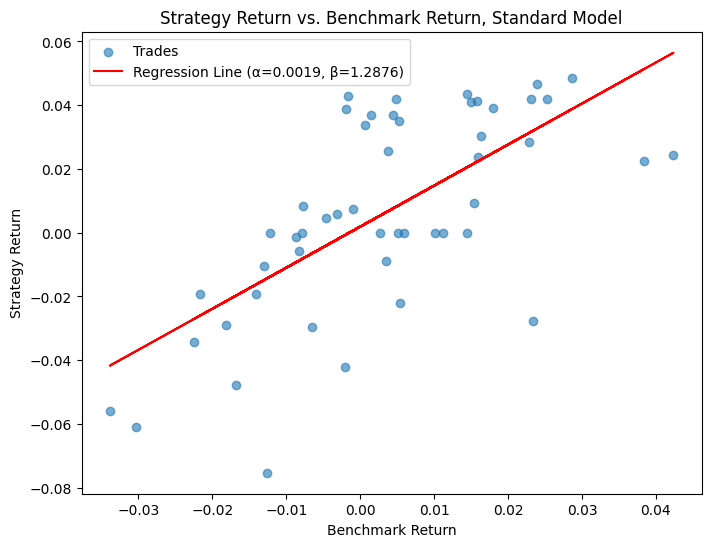

(0.0018882827932080403, 1.287599290846622)

In [40]:
benchmark_data_hourly_fetch = sb.fetch_historical_data(
    contract=benchmark,
    endDateTime='',         # Let IBKR set the "now" time
    durationStr='1 Y',      # Past 1 year
    barSizeSetting='1 hour', # Daily bars
    whatToShow='TRADES',
    useRTH=True,
)

benchmark_data_hourly = benchmark_data_hourly_fetch['hst_dta']

benchmark_data_daily_fetch = sb.fetch_historical_data(
    contract=benchmark,
    endDateTime='',         # Let IBKR set the "now" time
    durationStr='1 Y',      # Past 1 year
    barSizeSetting='1 day', # Daily bars
    whatToShow='TRADES',
    useRTH=True,
)

benchmark_data_daily = benchmark_data_daily_fetch['hst_dta']

# Fetch entry and exit prices from benchmark_data_hourly based on timestamps
blotter['entry_price_benchmark'] = blotter['entry_timestamp'].apply(
    lambda ts: benchmark_data_hourly.loc[benchmark_data_hourly['timestamp'] == ts, 'close'].iloc[0]
)

blotter['exit_price_benchmark'] = blotter.apply(
    lambda row: (
        benchmark_data_hourly.loc[benchmark_data_hourly['timestamp'] == row['exit_timestamp'], 'close'].iloc[0]
        if not benchmark_data_hourly.loc[benchmark_data_hourly['timestamp'] == row['exit_timestamp'], 'close'].empty
        else (
            benchmark_data_daily.loc[benchmark_data_daily['timestamp'] == row['exit_timestamp'], 'close'].iloc[0]
            if not benchmark_data_daily.loc[benchmark_data_daily['timestamp'] == row['exit_timestamp'], 'close'].empty
            else None  # If neither dataset has the timestamp
        )
    ), axis=1
)

#print(blotter['exit_price_benchmark'])

# Calculate return based on benchmark data vs. the strategy trades
blotter['return_benchmark'] = (blotter['exit_price_benchmark'] - blotter['entry_price_benchmark']) / blotter['entry_price_benchmark'] * (blotter['qty'] / abs(blotter['qty']))

'''x = pd.to_numeric(blotter['return_benchmark']) 
x.dropna(inplace=True) # drop NA, only trading period 48
y = pd.to_numeric(blotter['return']) 
y = y.drop(index=2024.48, errors='ignore') # drop period 48'''

x = pd.to_numeric(blotter['return_benchmark'])  
original_index = x.index.copy()
x.dropna(inplace=True)
dropped_rows = original_index.difference(x.index)
y = pd.to_numeric(blotter['return'])  
y.drop(index=dropped_rows, inplace=True)

#print(x,y)

# Scatter plot of returns
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label="Trades")
plt.xlabel("Benchmark Return")
plt.ylabel("Strategy Return")
plt.title("Strategy Return vs. Benchmark Return, Standard Model")

# Fit a linear regression model to get alpha and beta
x_with_const = sm.add_constant(x)  # Adds intercept for regression
model = sm.OLS(y, x_with_const).fit()
alpha, beta = model.params

# Plot regression line
plt.plot(x, alpha + beta * x, color='red', label=f"Regression Line (α={alpha:.4f}, β={beta:.4f})")
plt.legend()
plt.show()

# Print alpha and beta values

alpha, beta


### Enhanced

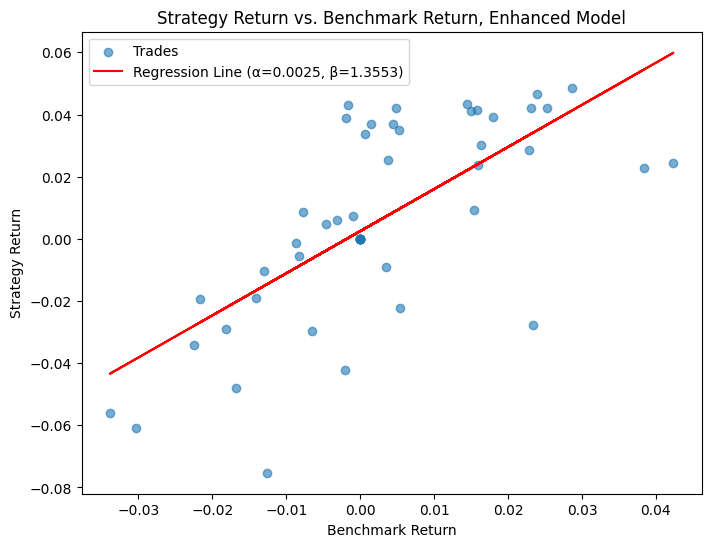

(0.0024558979168479863, 1.3553209798786088)

In [41]:
benchmark_data_hourly_fetch = sb.fetch_historical_data(
    contract=benchmark,
    endDateTime='',         # Let IBKR set the "now" time
    durationStr='1 Y',      # Past 1 year
    barSizeSetting='1 hour', # Daily bars
    whatToShow='TRADES',
    useRTH=True,
)

benchmark_data_hourly = benchmark_data_hourly_fetch['hst_dta']

benchmark_data_daily_fetch = sb.fetch_historical_data(
    contract=benchmark,
    endDateTime='',         # Let IBKR set the "now" time
    durationStr='1 Y',      # Past 1 year
    barSizeSetting='1 day', # Daily bars
    whatToShow='TRADES',
    useRTH=True,
)

benchmark_data_daily = benchmark_data_daily_fetch['hst_dta']

# Fetch entry and exit prices from benchmark_data_hourly based on timestamps
blotter['entry_price_benchmark'] = blotter['entry_timestamp'].apply(
    lambda ts: benchmark_data_hourly.loc[benchmark_data_hourly['timestamp'] == ts, 'close'].iloc[0]
)

blotter['exit_price_benchmark'] = blotter.apply(
    lambda row: (
        benchmark_data_hourly.loc[benchmark_data_hourly['timestamp'] == row['exit_timestamp'], 'close'].iloc[0]
        if not benchmark_data_hourly.loc[benchmark_data_hourly['timestamp'] == row['exit_timestamp'], 'close'].empty
        else (
            benchmark_data_daily.loc[benchmark_data_daily['timestamp'] == row['exit_timestamp'], 'close'].iloc[0]
            if not benchmark_data_daily.loc[benchmark_data_daily['timestamp'] == row['exit_timestamp'], 'close'].empty
            else None  # If neither dataset has the timestamp
        )
    ), axis=1
)

#print(blotter['exit_price_benchmark'])

# Calculate return based on benchmark data vs. the strategy trades
blotter['return_benchmark'] = (blotter['exit_price_benchmark'] - blotter['entry_price_benchmark']) / blotter['entry_price_benchmark'] * (blotter['qty'] / abs(blotter['qty'])) * blotter['prediction']

'''x = pd.to_numeric(blotter['return_benchmark']) 
x.dropna(inplace=True) # drop NA, only trading period 48
y = pd.to_numeric(blotter['return']) 
y = y.drop(index=2024.48, errors='ignore') # drop period 48'''

x = pd.to_numeric(blotter['return_benchmark'])  
original_index = x.index.copy()
x.dropna(inplace=True)
dropped_rows = original_index.difference(x.index)
y = pd.to_numeric(blotter['return'])  
y.drop(index=dropped_rows, inplace=True)

#print(x,y)

# Scatter plot of returns
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label="Trades")
plt.xlabel("Benchmark Return")
plt.ylabel("Strategy Return")
plt.title("Strategy Return vs. Benchmark Return, Enhanced Model")

# Fit a linear regression model to get alpha and beta
x_with_const = sm.add_constant(x)  # Adds intercept for regression
model = sm.OLS(y, x_with_const).fit()
alpha, beta = model.params

# Plot regression line
plt.plot(x, alpha + beta * x, color='red', label=f"Regression Line (α={alpha:.4f}, β={beta:.4f})")
plt.legend()
plt.show()

# Print alpha and beta values

alpha, beta

### 6.2.3: Strategy vs. Vol Error
Calculate your error (as a percentage) in the volatility model (i.e.,
(`exp_vol`-`obs_vol`)/`obs_vol`. Create a plot with vol error on the x-axis
and your strategy's returns **per trade** on the y-axis.

This plot is intended to give you, the trader, a rough idea of how
accuracy in forecasting volatility affects your strategy's returns. You may
be surprised by the results!

Fit a linear trendline through this data & print its coefficients. It might
not fit very well -- that's ok!

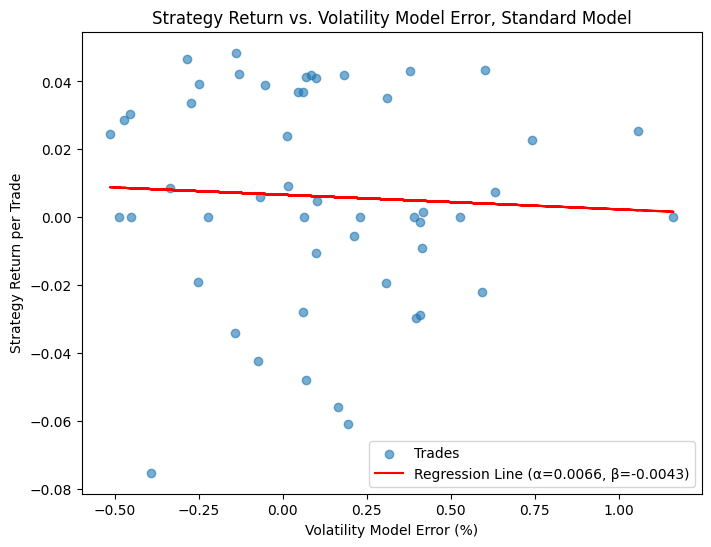

(0.0066080620869054165, -0.004297815374150794)

In [42]:
# Ensure exp_vol and obs_vol exist in blotter
blotter['vol_error'] = (vol_calcs['exp_vol'] - vol_calcs['obs_vol']) / vol_calcs['obs_vol']

# Extract x (vol error) and y (strategy return per trade)
x = pd.to_numeric(blotter['vol_error'])
y = pd.to_numeric(blotter['return'])

# Scatter plot of vol error vs. strategy return per trade
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label="Trades")
plt.xlabel("Volatility Model Error (%)")
plt.ylabel("Strategy Return per Trade")
plt.title("Strategy Return vs. Volatility Model Error, Standard Model")

# Fit a linear regression model to get alpha and beta
x_with_const = sm.add_constant(x)  # Adds intercept for regression
model = sm.OLS(y, x_with_const).fit()
alpha, beta = model.params

# Plot regression line
plt.plot(x, alpha + beta * x, color='red', label=f"Regression Line (α={alpha:.4f}, β={beta:.4f})")
plt.legend()
plt.show()

# Return alpha and beta values
alpha, beta

## 6.3: Strategy summary calcs
For your overall strategy, calculate:

- overall GMRR, annual
- overall vol, annual
- Sharpe

Print results.

In [45]:
# Compute period-over-period log returns from NAV as mentioned in Class 4 Slide 4
ledger['log_return'] = np.log(ledger['mkt_value'] / ledger['mkt_value'].shift(1))

# Drop NaN & Inf values
ledger['log_return'] = ledger['log_return'].replace([np.inf, -np.inf], np.nan).dropna()

log_returns = pd.to_numeric(ledger['log_return'])

# Define RFR per guidelines
risk_free_rate_annual = 0.0515

# Compute annualized GMRR using the mean log return
gmr_annual = np.exp(ledger['log_return'].mean() * 252) - 1 

# Compute annualized volatility
vol_annual = ledger['log_return'].std() * np.sqrt(252)

# Compute Sharpe Ratio using risk-free rate
sharpe_ratio = (gmr_annual - risk_free_rate_annual) / vol_annual if vol_annual != 0 else np.nan

# Print formatted results
print(f"Overall GMRR, Annual: {gmr_annual:.6f}")
print(f"Overall Vol, Annual: {vol_annual:.6f}")
print(f"Sharpe Ratio: {sharpe_ratio:.6f}")

Overall GMRR, Annual: 109.423924
Overall Vol, Annual: 6.824196
Sharpe Ratio: 16.027151


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
# Compute period-over-period log returns from NAV as mentioned in Class 4 Slide 4
new_ledger['log_return'] = np.log(new_ledger['mkt_value'] / new_ledger['mkt_value'].shift(1))

# Drop NaN & Inf values
new_ledger['log_return'] = new_ledger['log_return'].replace([np.inf, -np.inf], np.nan).dropna()

log_returns = pd.to_numeric(new_ledger['log_return'])

# Define RFR per guidelines
risk_free_rate_annual = 0.0515

# Compute annualized GMRR using the mean log return
gmr_annual = np.exp(new_ledger['log_return'].mean() * 252) - 1 

# Compute annualized volatility
vol_annual = new_ledger['log_return'].std() * np.sqrt(252)

# Compute Sharpe Ratio using risk-free rate
sharpe_ratio = (gmr_annual - risk_free_rate_annual) / vol_annual if vol_annual != 0 else np.nan

# Print formatted results
print(f"Smart Model Overall GMRR, Annual: {gmr_annual:.6f}")
print(f"Smart Model Overall Vol, Annual: {vol_annual:.6f}")
print(f"Smart Model Sharpe Ratio: {sharpe_ratio:.6f}")

Smart Model Overall GMRR, Annual: 79.745977
Smart Model Overall Vol, Annual: 6.820756
Smart Model Sharpe Ratio: 11.684112


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### 6.4: Commentary.
Comment on your results. As-is, do you consider this a decent strategy? What
 do you think you could do to improve performance? From your calculations, do
  you think that you could generate higher returns if you had a more accurate
   model for forecasting volatility? Add any other commentary or disussion
   that you think might be useful.

Vs. the benchmark, our strategy does quite well and generates some alpha, we generate a small amount of alpha vs the underlying (based on the underlying's close price during the entry and exit timestamps, effectively showing our limit sells are more efficient at capturing returns)  however, vs. the volatility error, our strategy does not generate alpha. This may be driven by us exiting positions too early (setting a too-conservative limit). It is worth noting the high beta to the underlying, which is partially driven by ARES beta (~1.2), however, the strategy is also quite levered partially due to its constant risk-taking.

Also evidenced in our NAV chart, it could be more optimal to hold cash in some situations instead of taking an action, particularly amongst large volatility to preserve capital instead of taking risk. When we underestimate volatility, we tend to generate better returns, which may indicate that when we overestimate vol, our limit orders do not fill. I think there is much more alpha to be generated by i) better-informing our initial trade decision at the beginning of the week and ii) better forecasting volatility to capture maximum upside and trying to minimize downside.